SVM Accuracy: 96.30%
Logistic Regression Accuracy: 96.30%

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.94      0.97        36

    accuracy                           0.96        54
   macro avg       0.95      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.94      0.97        36

    accuracy                           0.96        54
   macro avg       0.95      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



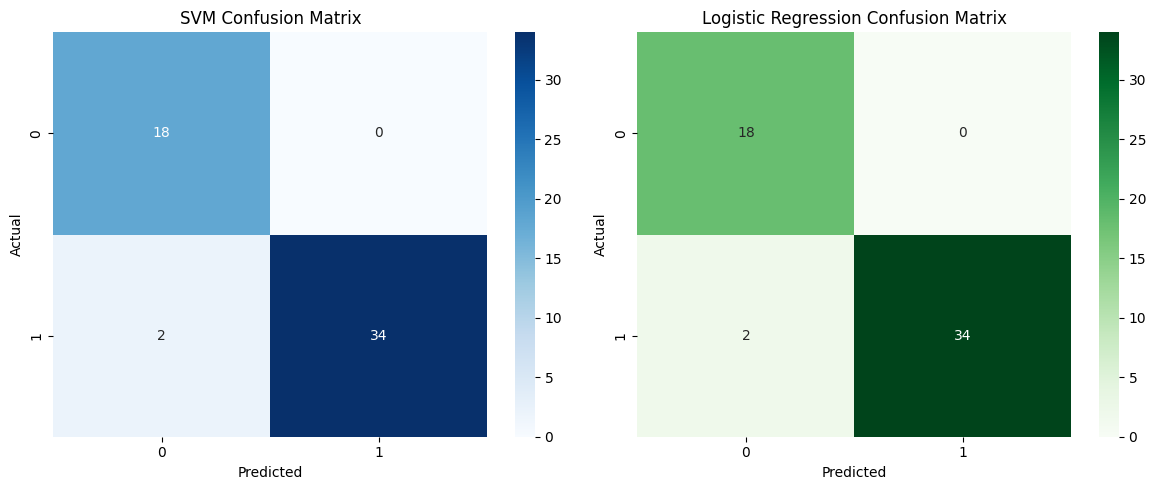

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_wine

# Load the inbuilt wine dataset
wine_data = load_wine()
wine = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
wine['quality'] = wine_data.target

# Convert quality into binary classification: 1 for good quality (>=1), 0 for bad quality (<1)
wine['quality_binary'] = wine['quality'].apply(lambda x: 1 if x >= 1 else 0)

# Features and target
X = wine.drop(['quality', 'quality_binary'], axis=1)
y = wine['quality_binary']

# Split the data into training and test sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Train a Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test_scaled)
logreg_predictions = logreg_model.predict(X_test_scaled)

# Evaluate accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)

print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")
print(f"Logistic Regression Accuracy: {logreg_accuracy * 100:.2f}%")

# Detailed classification report
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_predictions))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions))

# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('SVM Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, logreg_predictions), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Logistic Regression Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()
